## Building and Training Neural Networks

## UCI Pima Diabetes Dataset

* UCI ML Repositiory (http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)

### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

The UCI Pima Diabetes Dataset which has 8 numerical predictors and a binary outcome.

### Part 1: Data Exploration and Preprocessing

1. Read and load data into tf.data.Dataset object
2. Explore and pre-process the dataset. 
  
  
### Part 2: Building a Baseline Model using Keras

Using the Sequential model to quickly build a baseline neural network with one single hidden layer with 12 nodes. 

3. Split the data to training and testing dataset (75%, 25%)
4. Build the baseline model and finding how many parameters does my model have.
5. Train the model with 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128
6. Graph the trajectory of the loss functions, accuracy on both train and test set.
7. Evaluate and interpret the accuracy and loss performance during training, and testing. 

### Part 3: Find the Best Model

Here I'll try four different models and see if I can improve the accuracy by focusing on different network structures (i.e, activation functions, optimization algorithms, batch sizes, number of epochs, ...), affecting the performance, training time, and level of overfitting (or underfitting).

8. For all my models, plotting the confusion matrix and the ROC curve and interpreting their results. 
9. Which model has best performance, why?
10. Saving the best model weights into a binary file.
11. Use Keras Tuner to find the optimal modela and recording my observation.
12. Provide a Keras functional implementation of the optimal model in 11).



In [14]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [15]:
df = pd.read_csv('pima-indians-diabetes.csv')
print(df.head)

<bound method NDFrame.head of       6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]>


In [16]:
print(df.describe)

<bound method NDFrame.describe of       6  148  72  35    0  33.6  0.627  50  1
0     1   85  66  29    0  26.6  0.351  31  0
1     8  183  64   0    0  23.3  0.672  32  1
2     1   89  66  23   94  28.1  0.167  21  0
3     0  137  40  35  168  43.1  2.288  33  1
4     5  116  74   0    0  25.6  0.201  30  0
..   ..  ...  ..  ..  ...   ...    ...  .. ..
762  10  101  76  48  180  32.9  0.171  63  0
763   2  122  70  27    0  36.8  0.340  27  0
764   5  121  72  23  112  26.2  0.245  30  0
765   1  126  60   0    0  30.1  0.349  47  1
766   1   93  70  31    0  30.4  0.315  23  0

[767 rows x 9 columns]>


In [17]:
df.columns = ['num_of_times_pregnant','plasma_glucose_concentration', 'diastolic_blood_pressure', 'tricep_skin_fold_thickness',
             'serum_insulin', 'bmi', 'pedigree_function','age', 'class']

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   num_of_times_pregnant         767 non-null    int64  
 1   plasma_glucose_concentration  767 non-null    int64  
 2   diastolic_blood_pressure      767 non-null    int64  
 3   tricep_skin_fold_thickness    767 non-null    int64  
 4   serum_insulin                 767 non-null    int64  
 5   bmi                           767 non-null    float64
 6   pedigree_function             767 non-null    float64
 7   age                           767 non-null    int64  
 8   class                         767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 
# get the locations
X = df.iloc[:, 0:8]
Y = df.iloc[:, 8]
# split the dataset
X_train, X_test,Y_train,Y_test = train_test_split(
    X, Y, test_size=0.25, random_state=0)

Code for building ROC curve

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
log_regression = LogisticRegression()
log_regression.fit(X_train,Y_train)

C:\Users\Vibhav\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

***MODEL 1***
1. 2 dense layers with 16 and 32 units.
2. Output layers with activation function as softmax.
3. Optimizer = RMSprop, Loss = mean_squared_error
4. epochs = 20
5. batch size = 16

In [54]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_dim = 8, activation ='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for no diabetes and 1 for diabetes
    tf.keras.layers.Dense(1, activation='softmax')
])

In [55]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(learning_rate = 0.01), loss='mean_squared_error', metrics = ['accuracy'])

In [56]:
history = model.fit(X_train, Y_train, validation_split = 0.25, epochs = 20, batch_size = 16)
print(f"My model was trained for {len(history.epoch)} epochs")

Epoch 1/20
27/27 [==============================] - 1s 10ms/step - loss: 0.6613 - accuracy: 0.3387 - val_loss: 0.5833 - val_accuracy: 0.4167
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.3387 - val_loss: 0.5833 - val_accuracy: 0.4167
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.3387 - val_loss: 0.5833 - val_accuracy: 0.4167
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.3387 - val_loss: 0.5833 - val_accuracy: 0.4167
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.3387 - val_loss: 0.5833 - val_accuracy: 0.4167
Epoch 6/20
27/27 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.3387 - val_loss: 0.5833 - val_accuracy: 0.4167
Epoch 7/20
27/27 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.3387 - val_loss: 0.5833 - val_accuracy: 0.4167
Epoch 8/20
27/27 [=

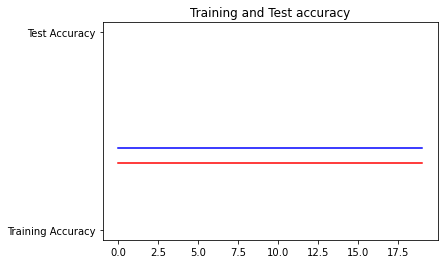

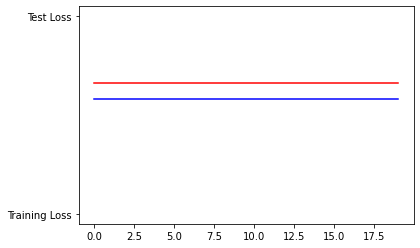

In [57]:
from matplotlib import pyplot as plt
acc=history.history['accuracy']
test_acc=history.history['val_accuracy']
loss=history.history['loss']
test_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, test_acc, 'b', "Test Accuracy")
plt.title('Training and Test accuracy')
plt.show()
print("")
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, test_loss, 'b', "Test Loss")
plt.show()

In [18]:
import sklearn
y_pred = model.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(Y_test, np.rint(y_pred))
print(confusion_matrix)

6/6 [==============================] - 0s 1ms/step
[[  0 131]
 [  0  61]]


DISCUSSION: Here we can see from the confusion matrix our 1st model does a very bad job at predicting test data. 

6/6 [==============================] - 0s 3ms/step


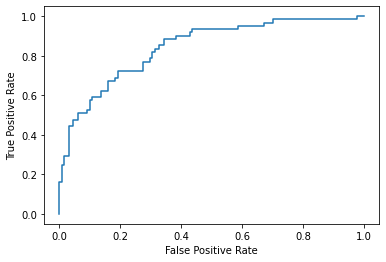

In [59]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_keras)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

# ROC Function
def plot_roc_curve(Y_test, model_probs):

    # calculate AUC
    model_auc = roc_auc_score(Y_test, model_probs)
    # summarize score
    print('Model: ROC AUC=%.3f' % (model_auc))
    # calculate ROC Curve
    # For the actual model
    model_fpr, model_tpr, _ = roc_curve(Y_test, model_probs)
    # Plot the roc curve for the model and the random model line
    plt.plot(model_fpr, model_tpr, marker='.', label='Model')
    # Create labels for the axis
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

DISCUSSION: We see that the training and test accuracy are 33.87% and 41.67% respectively. These are low values and by their
graph saturates after the 1st epoch which means there was no point training after the 1st epoch, this suggests high bias.

***MODEL 2***
1. 2 dense layers with 16 and 32 units.
2. Output layers with activation function as sigmoid.
3. Optimizer = RMSprop, Loss = mean_squared_error
4. epochs = 20
5. batch size = 32

In [64]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_dim = 8, activation ='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for no diabetes and 1 for diabetes
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [65]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(learning_rate = 0.01), loss='mean_squared_error', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, validation_split = 0.25, epochs = 20, batch_size = 16)
print(f"My model was trained for {len(history.epoch)} epochs")

Epoch 1/20
27/27 [==============================] - 1s 10ms/step - loss: 0.6605 - accuracy: 0.3387 - val_loss: 0.5833 - val_accuracy: 0.4167
Epoch 2/20
27/27 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.3387 - val_loss: 0.5833 - val_accuracy: 0.4167
Epoch 3/20
27/27 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.3387 - val_loss: 0.5833 - val_accuracy: 0.4167
Epoch 4/20
27/27 [==============================] - 0s 3ms/step - loss: 0.6613 - accuracy: 0.3387 - val_loss: 0.5833 - val_accuracy: 0.4167
Epoch 5/20
27/27 [==============================] - 0s 3ms/step - loss: 0.6605 - accuracy: 0.3387 - val_loss: 0.4095 - val_accuracy: 0.5903
Epoch 6/20
27/27 [==============================] - 0s 3ms/step - loss: 0.3388 - accuracy: 0.6613 - val_loss: 0.4167 - val_accuracy: 0.5833
Epoch 7/20
27/27 [==============================] - 0s 3ms/step - loss: 0.3387 - accuracy: 0.6613 - val_loss: 0.4167 - val_accuracy: 0.5833
Epoch 8/20
27/27 [=

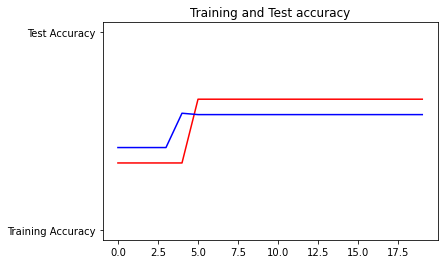

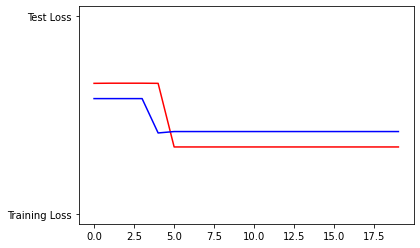

In [66]:
from matplotlib import pyplot as plt
acc=history.history['accuracy']
test_acc=history.history['val_accuracy']
loss=history.history['loss']
test_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, test_acc, 'b', "Test Accuracy")
plt.title('Training and Test accuracy')
plt.show()
print("")
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, test_loss, 'b', "Test Loss")
plt.show()

In [67]:
import sklearn
y_pred = model.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(Y_test, np.rint(y_pred))
print(confusion_matrix)

6/6 [==============================] - 0s 5ms/step
[[131   0]
 [ 61   0]]


DISCUSSION: Here we can see from confusion matrix this model does a better job than predicting test data but still is not
accurate in predicting true negatives.

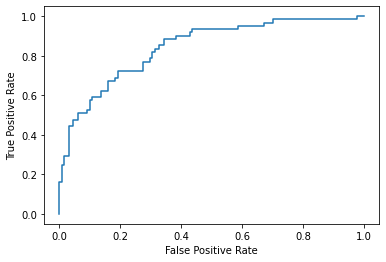

In [68]:
y = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

DISCUSSION: From above we see that our validation accuracy has improved by adding the sigmoid activation function to the
output layer. But we still face the problem of saturation.

***MODEL 3***
1. 2 dense layers with 16 and 32 units.
2. Output layers with activation function as sigmoid.
3. Optimizer = RMSprop, Loss = binary crossentropy
4. epochs = 25
5. batch size = 16

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_dim = 8, activation ='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for no diabetes and 1 for diabetes
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [70]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer = RMSprop(learning_rate = 0.01), loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, validation_split = 0.25, epochs = 25, batch_size = 16)
print(f"My model was trained for {len(history.epoch)} epochs")

Epoch 1/25
27/27 [==============================] - 1s 11ms/step - loss: 6.8406 - accuracy: 0.5615 - val_loss: 5.7622 - val_accuracy: 0.4722
Epoch 2/25
27/27 [==============================] - 0s 3ms/step - loss: 2.9277 - accuracy: 0.5708 - val_loss: 2.1840 - val_accuracy: 0.5694
Epoch 3/25
27/27 [==============================] - 0s 3ms/step - loss: 1.8603 - accuracy: 0.5940 - val_loss: 1.5160 - val_accuracy: 0.5903
Epoch 4/25
27/27 [==============================] - 0s 3ms/step - loss: 1.3403 - accuracy: 0.5986 - val_loss: 0.8499 - val_accuracy: 0.5903
Epoch 5/25
27/27 [==============================] - 0s 3ms/step - loss: 0.9681 - accuracy: 0.5963 - val_loss: 1.0042 - val_accuracy: 0.6111
Epoch 6/25
27/27 [==============================] - 0s 3ms/step - loss: 0.8279 - accuracy: 0.5940 - val_loss: 1.0164 - val_accuracy: 0.5417
Epoch 7/25
27/27 [==============================] - 0s 3ms/step - loss: 0.7825 - accuracy: 0.6357 - val_loss: 0.7483 - val_accuracy: 0.6111
Epoch 8/25
27/27 [=

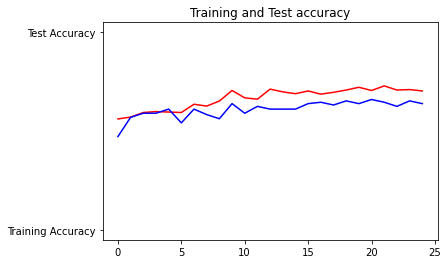

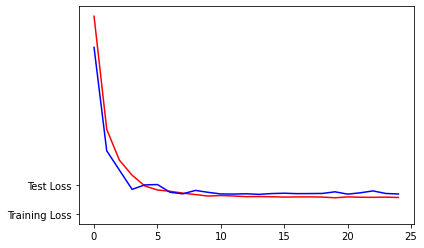

In [71]:
from matplotlib import pyplot as plt
acc=history.history['accuracy']
test_acc=history.history['val_accuracy']
loss=history.history['loss']
test_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, test_acc, 'b', "Test Accuracy")
plt.title('Training and Test accuracy')
plt.show()
print("")
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, test_loss, 'b', "Test Loss")
plt.show()

In [72]:
import sklearn
y_pred = model.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(Y_test, np.rint(y_pred))
print(confusion_matrix)

6/6 [==============================] - 0s 4ms/step
[[109  22]
 [ 23  38]]


6/6 [==============================] - 0s 2ms/step


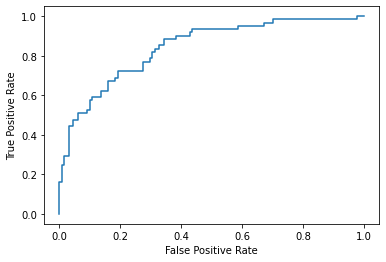

In [73]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y_test, y_pred_keras)
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

DISCUSSION: We have attained high accuracy for both training and validation datasets, this highlights the importance of
choosing the right loss function for the DNN. The model does a good job predicting true positives and negatives. Let's try and tweak the optimizer to see if we can achieve a better model thus higher accuracy.

***MODEL 4***
1. 2 dense layers with 16 and 32 units.
2. Output layers with activation function as sigmoid.
3. Optimizer = Adam, Loss = binary crossentropy
4. epochs = 25
5. batch size = 16

In [100]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_dim = 8, activation ='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for no diabetes and 1 for diabetes
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [102]:
model.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, validation_split = 0.25, epochs = 25, batch_size = 16)
print(f"My model was trained for {len(history.epoch)} epochs")

Epoch 1/25
27/27 [==============================] - 1s 10ms/step - loss: 0.8289 - accuracy: 0.6613 - val_loss: 0.9659 - val_accuracy: 0.6042
Epoch 2/25
27/27 [==============================] - 0s 3ms/step - loss: 0.6445 - accuracy: 0.6752 - val_loss: 0.7919 - val_accuracy: 0.6389
Epoch 3/25
27/27 [==============================] - 0s 3ms/step - loss: 0.5864 - accuracy: 0.6914 - val_loss: 0.7714 - val_accuracy: 0.6528
Epoch 4/25
27/27 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.7169 - val_loss: 0.7613 - val_accuracy: 0.6458
Epoch 5/25
27/27 [==============================] - 0s 3ms/step - loss: 0.5705 - accuracy: 0.6937 - val_loss: 0.7777 - val_accuracy: 0.6528
Epoch 6/25
27/27 [==============================] - 0s 3ms/step - loss: 0.5718 - accuracy: 0.6937 - val_loss: 0.7568 - val_accuracy: 0.6528
Epoch 7/25
27/27 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.7077 - val_loss: 0.7533 - val_accuracy: 0.6736
Epoch 8/25
27/27 [=

In [84]:
model.save_weights(filepath='final_weight.BIN')

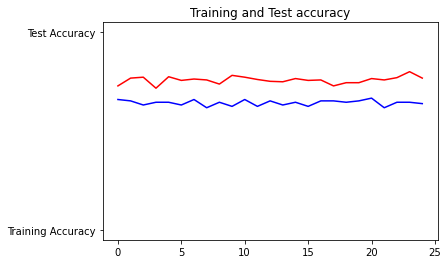

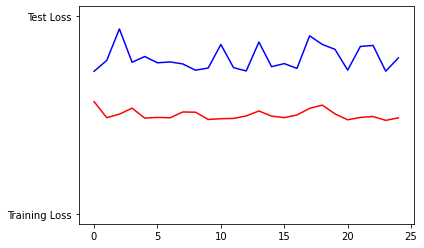

In [83]:
from matplotlib import pyplot as plt
acc=history.history['accuracy']
test_acc=history.history['val_accuracy']
loss=history.history['loss']
test_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, test_acc, 'b', "Test Accuracy")
plt.title('Training and Test accuracy')
plt.show()
print("")
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, test_loss, 'b', "Test Loss")
plt.show()

In [85]:
import sklearn
y_pred = model.predict(X_test)
confusion_matrix = sklearn.metrics.confusion_matrix(Y_test, np.rint(y_pred))
print(confusion_matrix)

6/6 [==============================] - 0s 2ms/step
[[114  17]
 [ 26  35]]


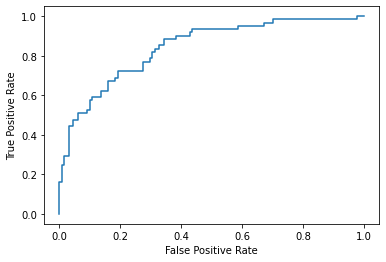

In [86]:
y = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

DISCUSSION: For our scenario we can see the Adam optimizer function performs better than RMSprop optimizer. So we will stick to model 4 where optimizer = Adam and loss = binary crossentropy.

***USING KERAS TUNER***

In [43]:
!pip install keras-tuner

     -------------------------------------- 135.7/135.7 kB 1.2 MB/s eta 0:00:00
  Using cached urllib3-1.24.3-py2.py3-none-any.whl (118 kB)
     -------------------------------------- 177.8/177.8 kB 3.6 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.14
    Uninstalling urllib3-1.26.14:
      Successfully uninstalled urllib3-1.26.14
  Attempting uninstall: google-auth
    Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
pyppeteer 1.0.2 requires urllib3<2.0.0,>=1.25.8, but you have urllib3 1.24.3 which is incompatible.
google-cloud-storage 1.31.0 requires google-auth<2.0dev,>=1.11.0, but you have google-auth 2.16.0 which is incompatible.
google-cloud-core 1.7.1 requires google-auth<2.0dev,>=1.24.0, but you have google-auth 2.16.0 which is incompatible.
google-api-core 1.25.1 requires google-auth<2.0dev,>=1.21.1, but you have google-auth 2.16.0 which is incompatible.
google-api-core 1.25.1 requires six>=1.13.0, but you have six 1.12.0 which is incompatible.
cookiecutter 1.7.3 requires requests>=2.23.0, but you have requests 2.21.0 which is incompatible.
botocore 1.24.32 requires urllib3<1.27,>=1.25.4,

In [87]:
import tensorflow as tf
import kerastuner as kt

C:\Users\Vibhav\AppData\Local\Temp\ipykernel_7028\1984828175.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [88]:
from tensorflow.keras import layers


def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Dense(16, input_dim =8, activation = 'relu'))
    model.add(layers.Dense(32, activation = 'relu'))
    model.add(
        layers.Dense(
            # Define the hyperparameter.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        )
    )
    model.add(layers.Dense(1, activation="sigmoid"))
    model.compile(
        optimizer='Adam', loss="binary_crossentropy", metrics=["accuracy"]
    )
    return model

In [89]:
import keras_tuner

build_model(keras_tuner.HyperParameters())

In [103]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=20,
    executions_per_trial=2,
    overwrite=True,
    directory="my_dir",
    project_name="assignment1",
)

In [104]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}


In [105]:
tuner.search(X_train, Y_train, epochs=2, validation_data=(X_test, Y_test))

Trial 16 Complete [00h 00m 03s]
val_accuracy: 0.6666666567325592

Best val_accuracy So Far: 0.7109375
Total elapsed time: 00h 00m 49s
INFO:tensorflow:Oracle triggered exit


In [106]:
tuner.results_summary()

Results summary
Results in my_dir\assignment1
Showing 10 best trials
Trial summary
Hyperparameters:
units: 384
Score: 0.7109375
Trial summary
Hyperparameters:
units: 288
Score: 0.7083333134651184
Trial summary
Hyperparameters:
units: 512
Score: 0.7005208432674408
Trial summary
Hyperparameters:
units: 320
Score: 0.6901041567325592
Trial summary
Hyperparameters:
units: 352
Score: 0.6848958432674408
Trial summary
Hyperparameters:
units: 448
Score: 0.6822916865348816
Trial summary
Hyperparameters:
units: 416
Score: 0.671875
Trial summary
Hyperparameters:
units: 256
Score: 0.671875
Trial summary
Hyperparameters:
units: 96
Score: 0.6692708432674408
Trial summary
Hyperparameters:
units: 160
Score: 0.6666666567325592


DISCUSSION: In keras tuner the validation accuracy reached maximum of 71% with 384 units in the neural network which is higher the validation accuracy of our best model which was model 4.

***KERAS FUNCTIONAL API FOR TUNER***

In [110]:
model = tf.keras.models.Sequential([
   # tf.keras.layers.Dense(256, input_dim = 8, activation ='relu'),
    tf.keras.layers.Dense(384, input_dim = 8, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for no diabetes and 1 for diabetes
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [111]:
model.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, Y_train, validation_split = 0.25, epochs = 25, batch_size = 16)
print(f"My model was trained for {len(history.epoch)} epochs")

Epoch 1/25
27/27 [==============================] - 1s 9ms/step - loss: 1.5993 - accuracy: 0.5916 - val_loss: 1.1171 - val_accuracy: 0.5903
Epoch 2/25
27/27 [==============================] - 0s 3ms/step - loss: 0.7721 - accuracy: 0.6497 - val_loss: 0.7890 - val_accuracy: 0.5903
Epoch 3/25
27/27 [==============================] - 0s 3ms/step - loss: 0.7075 - accuracy: 0.6381 - val_loss: 0.7102 - val_accuracy: 0.6667
Epoch 4/25
27/27 [==============================] - 0s 3ms/step - loss: 0.7311 - accuracy: 0.6497 - val_loss: 1.0281 - val_accuracy: 0.6597
Epoch 5/25
27/27 [==============================] - 0s 2ms/step - loss: 0.6702 - accuracy: 0.6705 - val_loss: 1.3246 - val_accuracy: 0.5000
Epoch 6/25
27/27 [==============================] - 0s 3ms/step - loss: 0.8256 - accuracy: 0.6520 - val_loss: 0.8561 - val_accuracy: 0.6458
Epoch 7/25
27/27 [==============================] - 0s 3ms/step - loss: 0.7711 - accuracy: 0.6311 - val_loss: 1.0640 - val_accuracy: 0.5903
Epoch 8/25
27/27 [==

In [112]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 384)               3456      
                                                                 
 dense_11 (Dense)            (None, 1)                 385       
                                                                 
Total params: 3,841
Trainable params: 3,841
Non-trainable params: 0
_________________________________________________________________


DISCUSSION: From above we can see that we can recreate the accuracy of our tuner with keras functional using with units 384.